# 항공사 고객 만족도 예측 경진대회 EDA

이 대회는 이용 고객의 성별, 나이 등 인적사항과 비행 거리, 지연 시간 등의 정보들을 통해 고객 만족도를 예측하는 대회입니다.

target은 만족(1)/불만족(0)으로 이루어져 있습니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

## 패키지 설치

EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

## 데이터 불러오기

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('train_final.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
data # 데이터를 확인합니다.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Male,Loyal Customer,72,Business travel,Business,1784,1,1,4,1,3,5,5,2,2,3,2,5,2,0,0,0,1
1,Male,Loyal Customer,35,Business travel,Business,2228,2,5,5,5,1,1,2,2,2,2,2,4,2,0,0,8,0
2,Male,disloyal Customer,37,Business travel,Eco,1970,4,3,4,1,1,4,1,1,3,2,5,1,4,0,1,2,1
3,Female,Loyal Customer,20,Personal Travel,Eco,2249,5,5,1,3,1,1,1,1,4,1,4,1,5,0,0,0,1
4,Male,disloyal Customer,38,Business travel,Eco,1995,2,2,2,2,5,2,5,5,2,5,3,1,2,0,110,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Female,Loyal Customer,38,Personal Travel,Eco,2085,3,3,3,3,3,4,5,2,2,2,2,4,2,1,0,2,1
2995,Male,Loyal Customer,58,Business travel,Business,614,1,1,1,1,3,4,4,1,1,1,1,3,1,3,13,8,0
2996,Male,Loyal Customer,42,Business travel,Business,2207,4,5,5,5,5,2,2,4,4,4,4,3,4,4,0,20,0
2997,Male,Loyal Customer,46,Personal Travel,Eco,1486,3,4,3,3,1,3,1,1,4,4,3,3,4,1,0,0,0


데이터를 보아하니 Gender, Customer Type, Type of Travel, Class는 텍스트로 이루어진 카테고리형 데이터네요.

또한 수치형 데이터 중 Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes를 제외한 feature들은

1~5 사이의 정도(degree)를 나타내는 정수형 데이터입니다.

분석 전에 적절한 처리가 필요할 것 같습니다.

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [2]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


결측치가 존재하지 않는 데이터셋이네요!

## 기초 통계 분석

이제 본격적으로 우리가 가진 데이터를 분석 해보도록 하겠습니다!

주어진 데이터를 기초 통계량이라는 숫자로 요약하고 확인해보겠습니다.

In [3]:
# 기초 통계량을 살펴봅니다.
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.578193,1970.913971,2.820940,2.966656,2.866622,3.005669,3.250417,3.401467,3.527176,3.489496,3.495498,3.507503,3.713571,3.349116,3.721574,3.361787,14.520840,15.054018,0.547516
std,15.192597,1010.887709,1.395079,1.528762,1.454290,1.305669,1.304395,1.322388,1.311866,1.297791,1.252841,1.294724,1.140111,1.240504,1.141216,1.307399,34.447669,35.426230,0.497820
min,7.000000,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1344.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,1939.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2554.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6588.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


In [4]:
# 전체의 데이터 타입을 확인합니다
data.dtypes

Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes              int64
target                          

### feature 분포 시각화

전체 변수들을 그래프로 시각화해보겠습니다. 

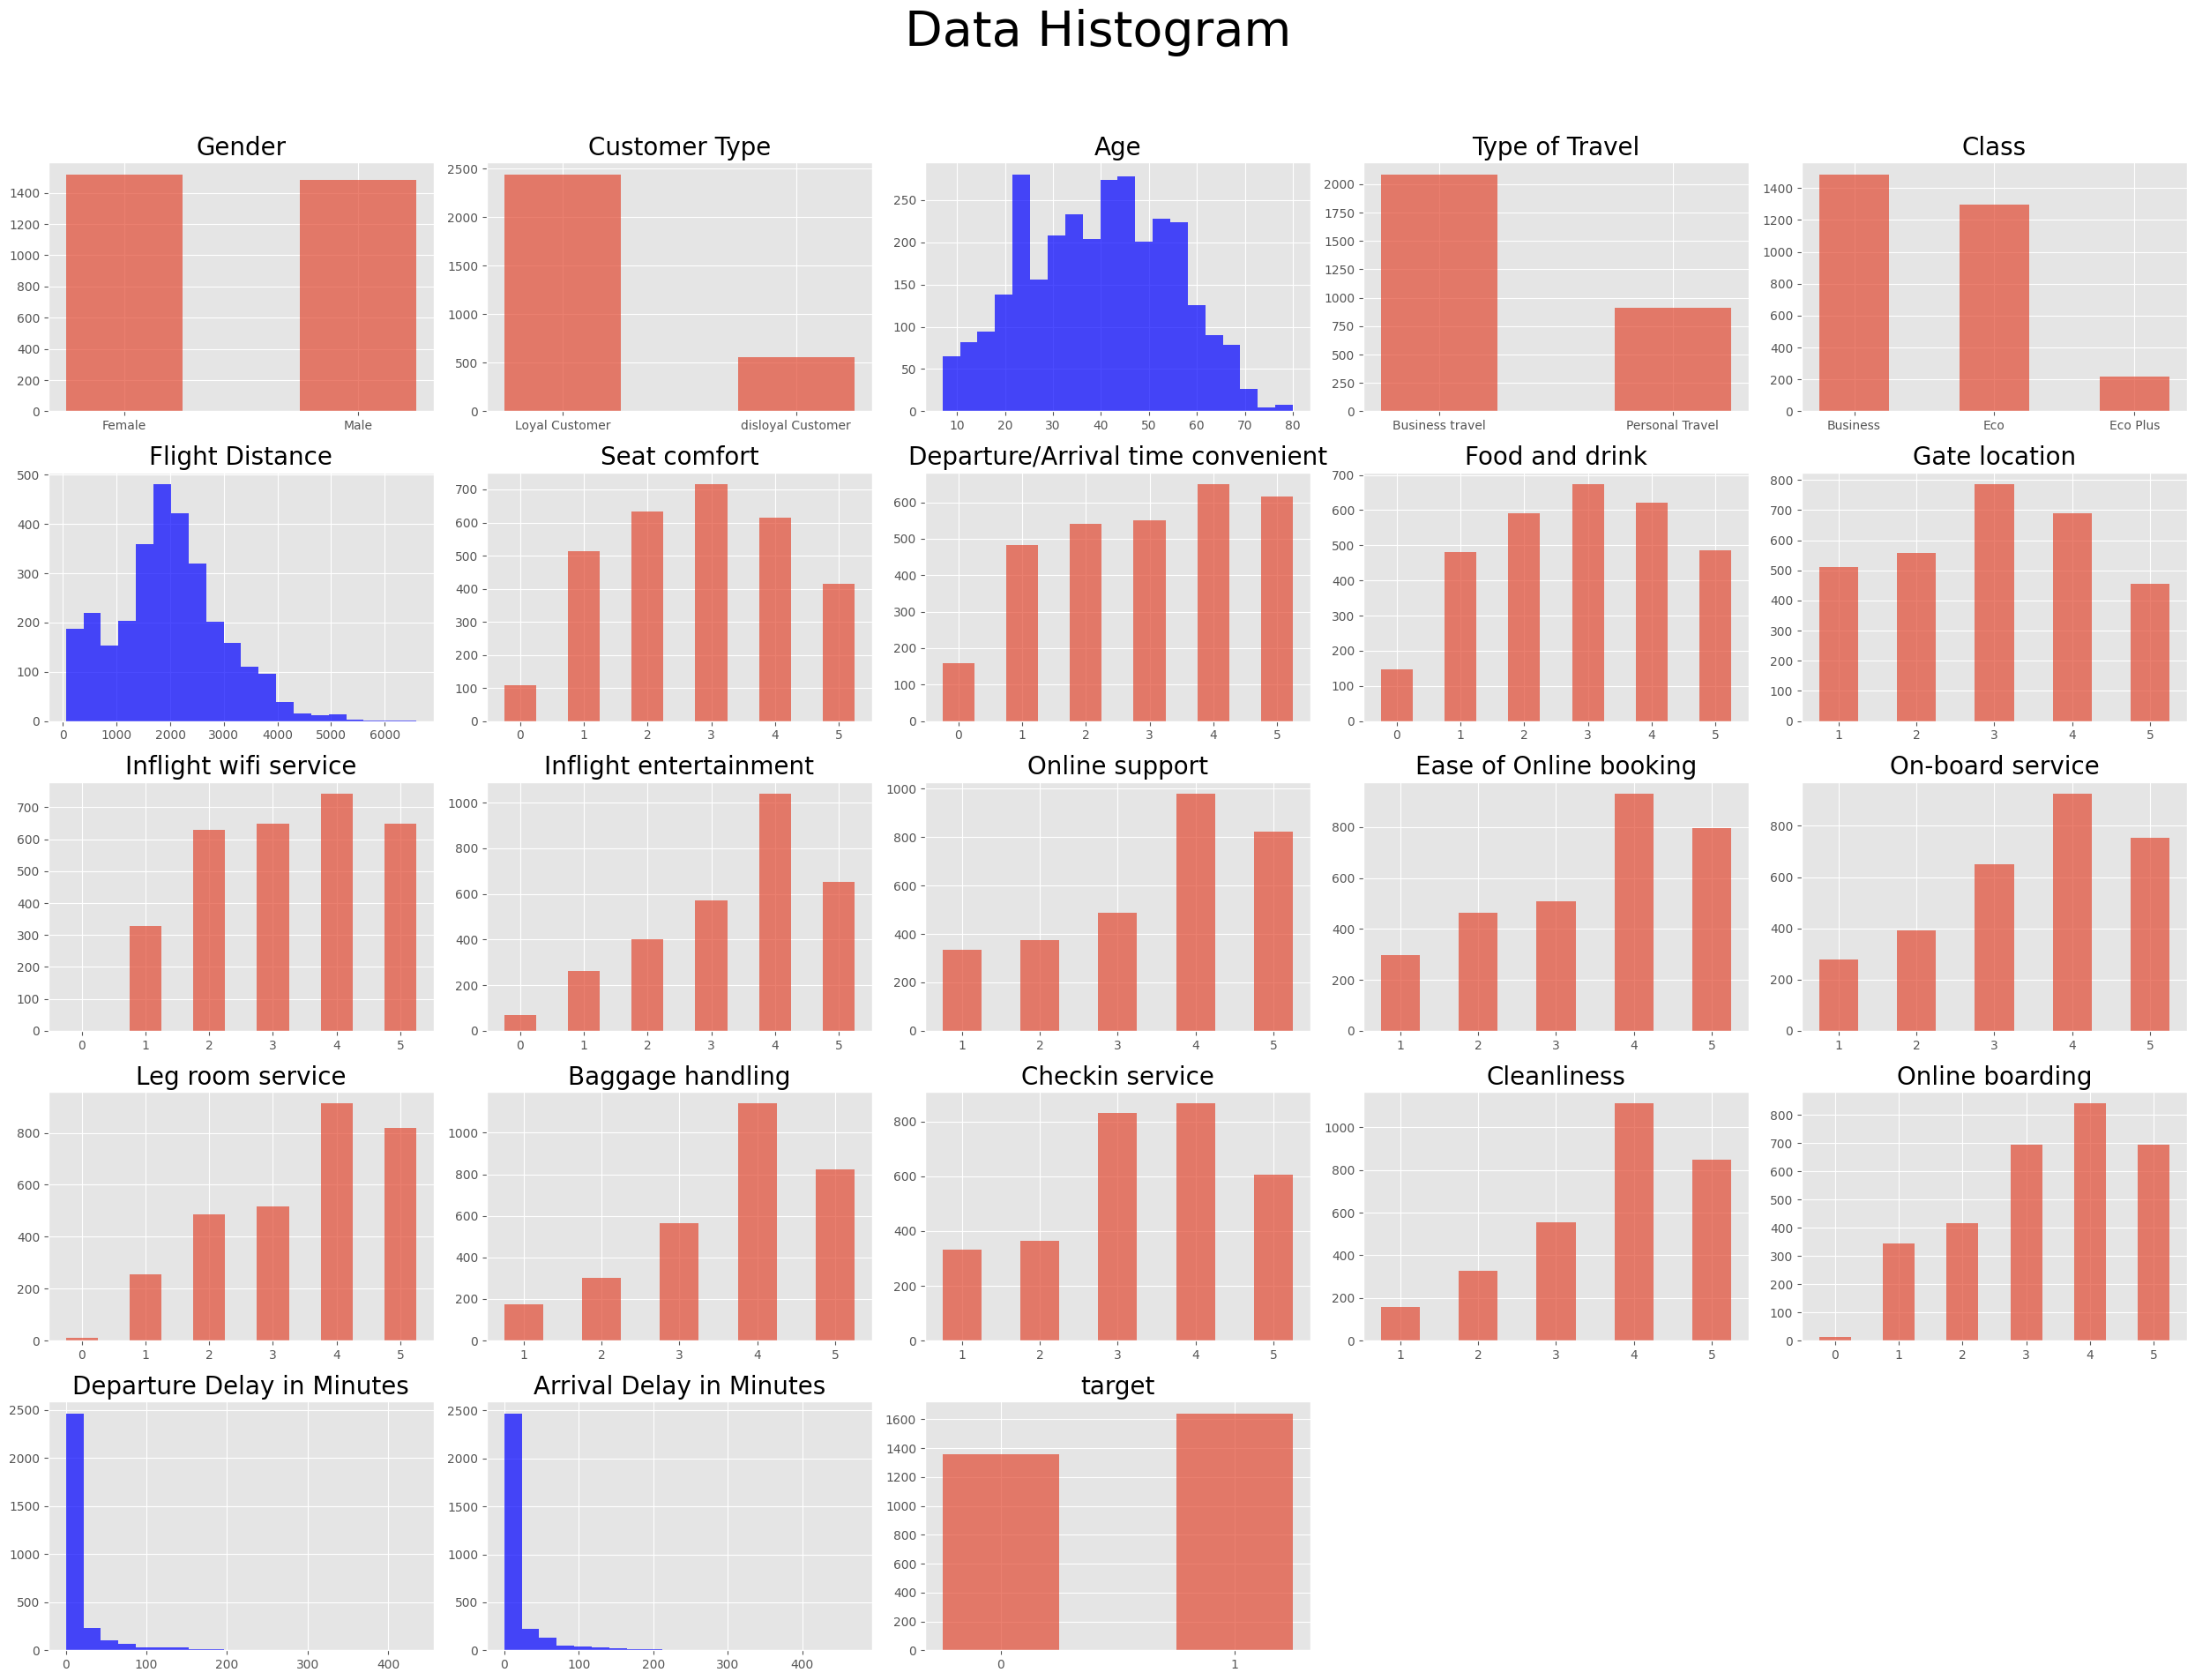

In [5]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 나이(age)는 정규 분포 형태를 이루는 것으로 보입니다.
- 성별(sex)은 남자 여자 비율이 비슷하네요.
- Age를 제외한 연속형 변수들이 왼쪽으로 치우쳐져 있다는 것이 눈에 띄네요.
- target은 약간 차이가 있지만 이정도면 심각한 imbalance는 아닌 듯 보입니다.

### target과 feature의 관계

범주형 변수의 카테고리에 따른 target feature의 분포를 살펴보기 위해 violin 그래프를 사용해보겠습니다.

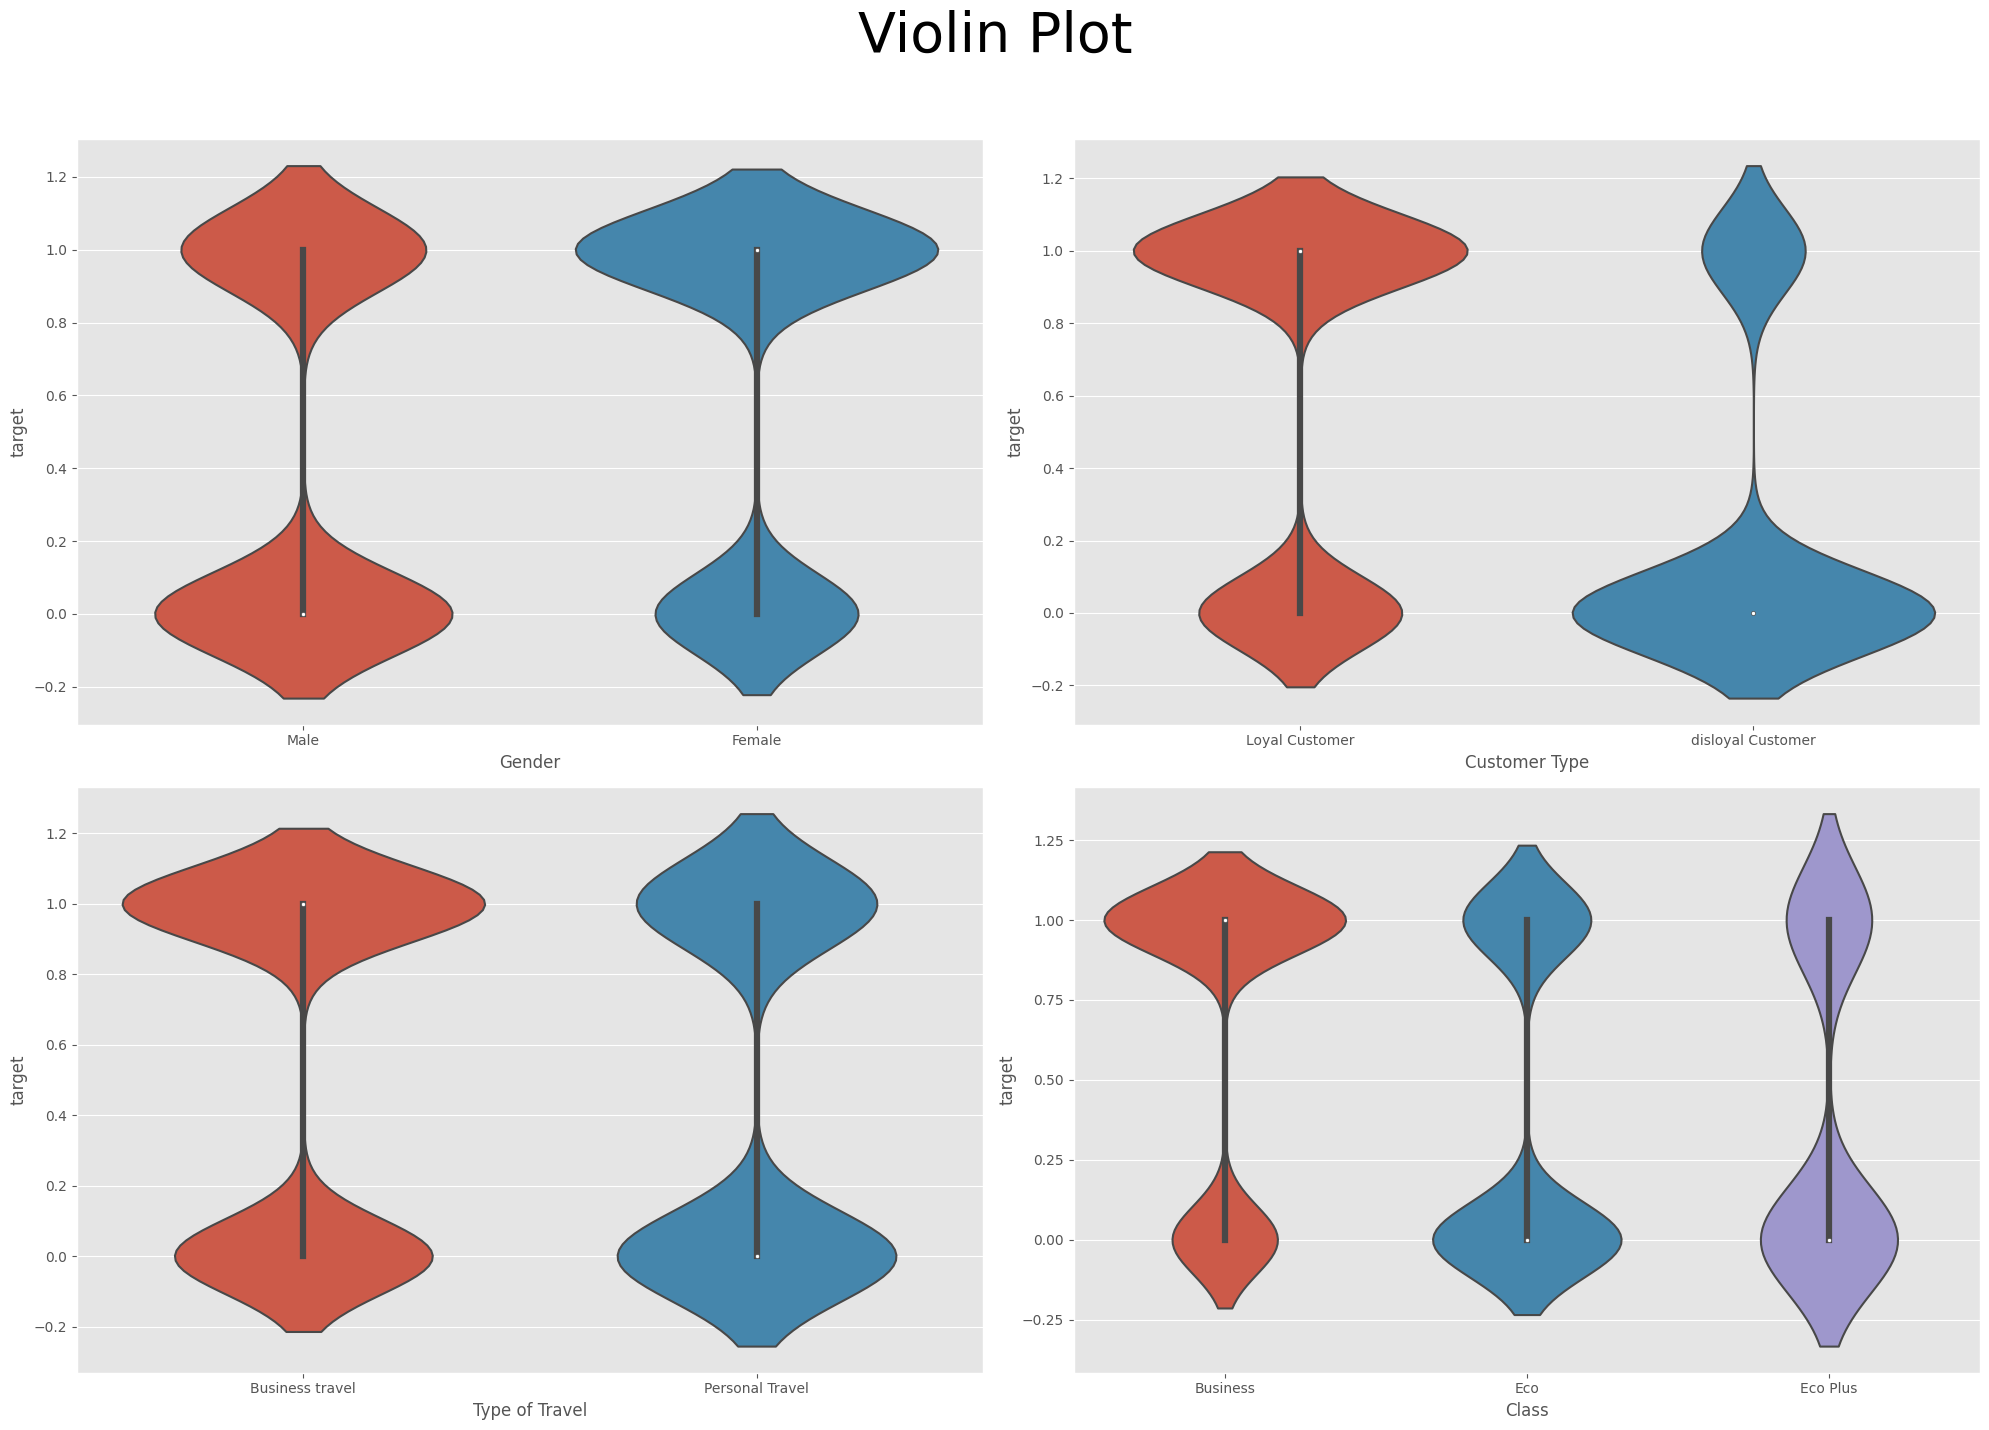

In [6]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

박스플롯을 보니 Customer Type 변수에서 disloyal인지 Loyal인지에 따라 만족도(target)이 상당히 차이가 나는 것을 확인할 수 있습니다. 

해당 변수는 예측에 있어 중요한 변수라고도 볼 수 있겠네요!

다음으로 수치형 데이터의 분포를 확인하기 위해 박스플롯을 그려봅니다.

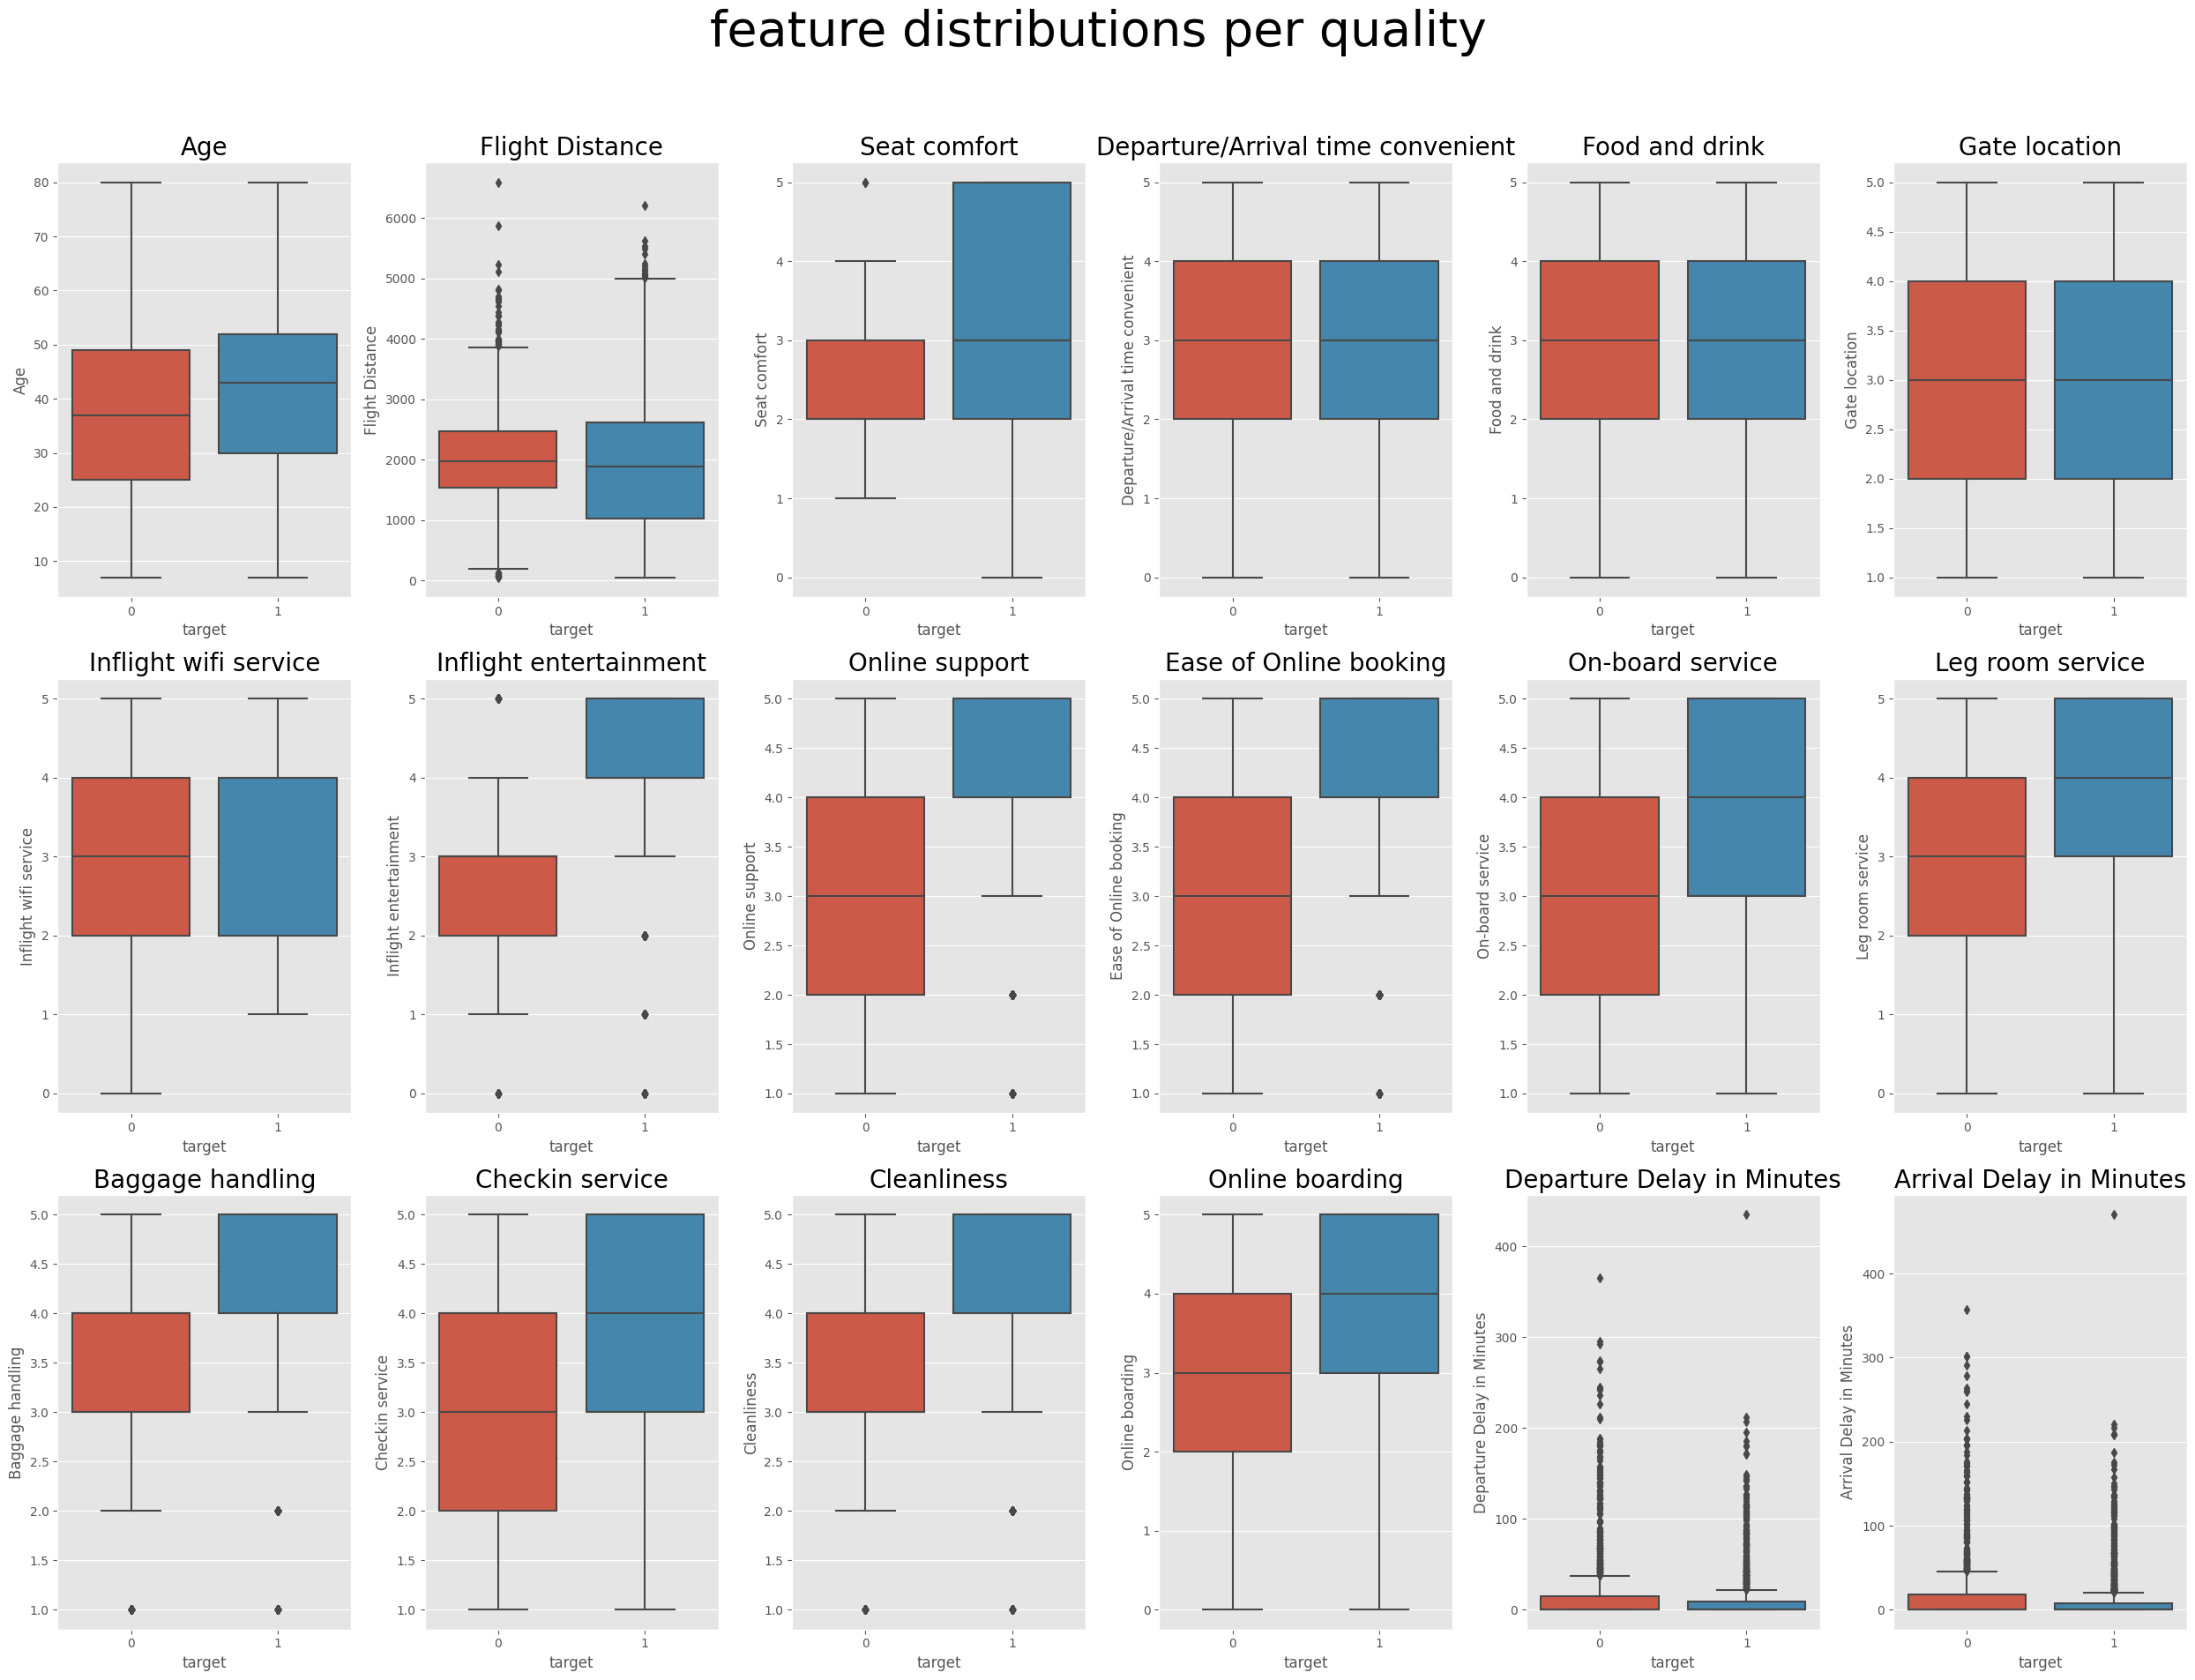

In [7]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

박스 플롯을 보니 age, Departure/Arrival time convenient, gate location 과 같은 변수는 target 에 영향이 없는 듯하네요. (이들은 분석에서 제거해도 무관할 듯 합니다!)

## 상관관계 시각화

feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴보겠습니다.

In [8]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

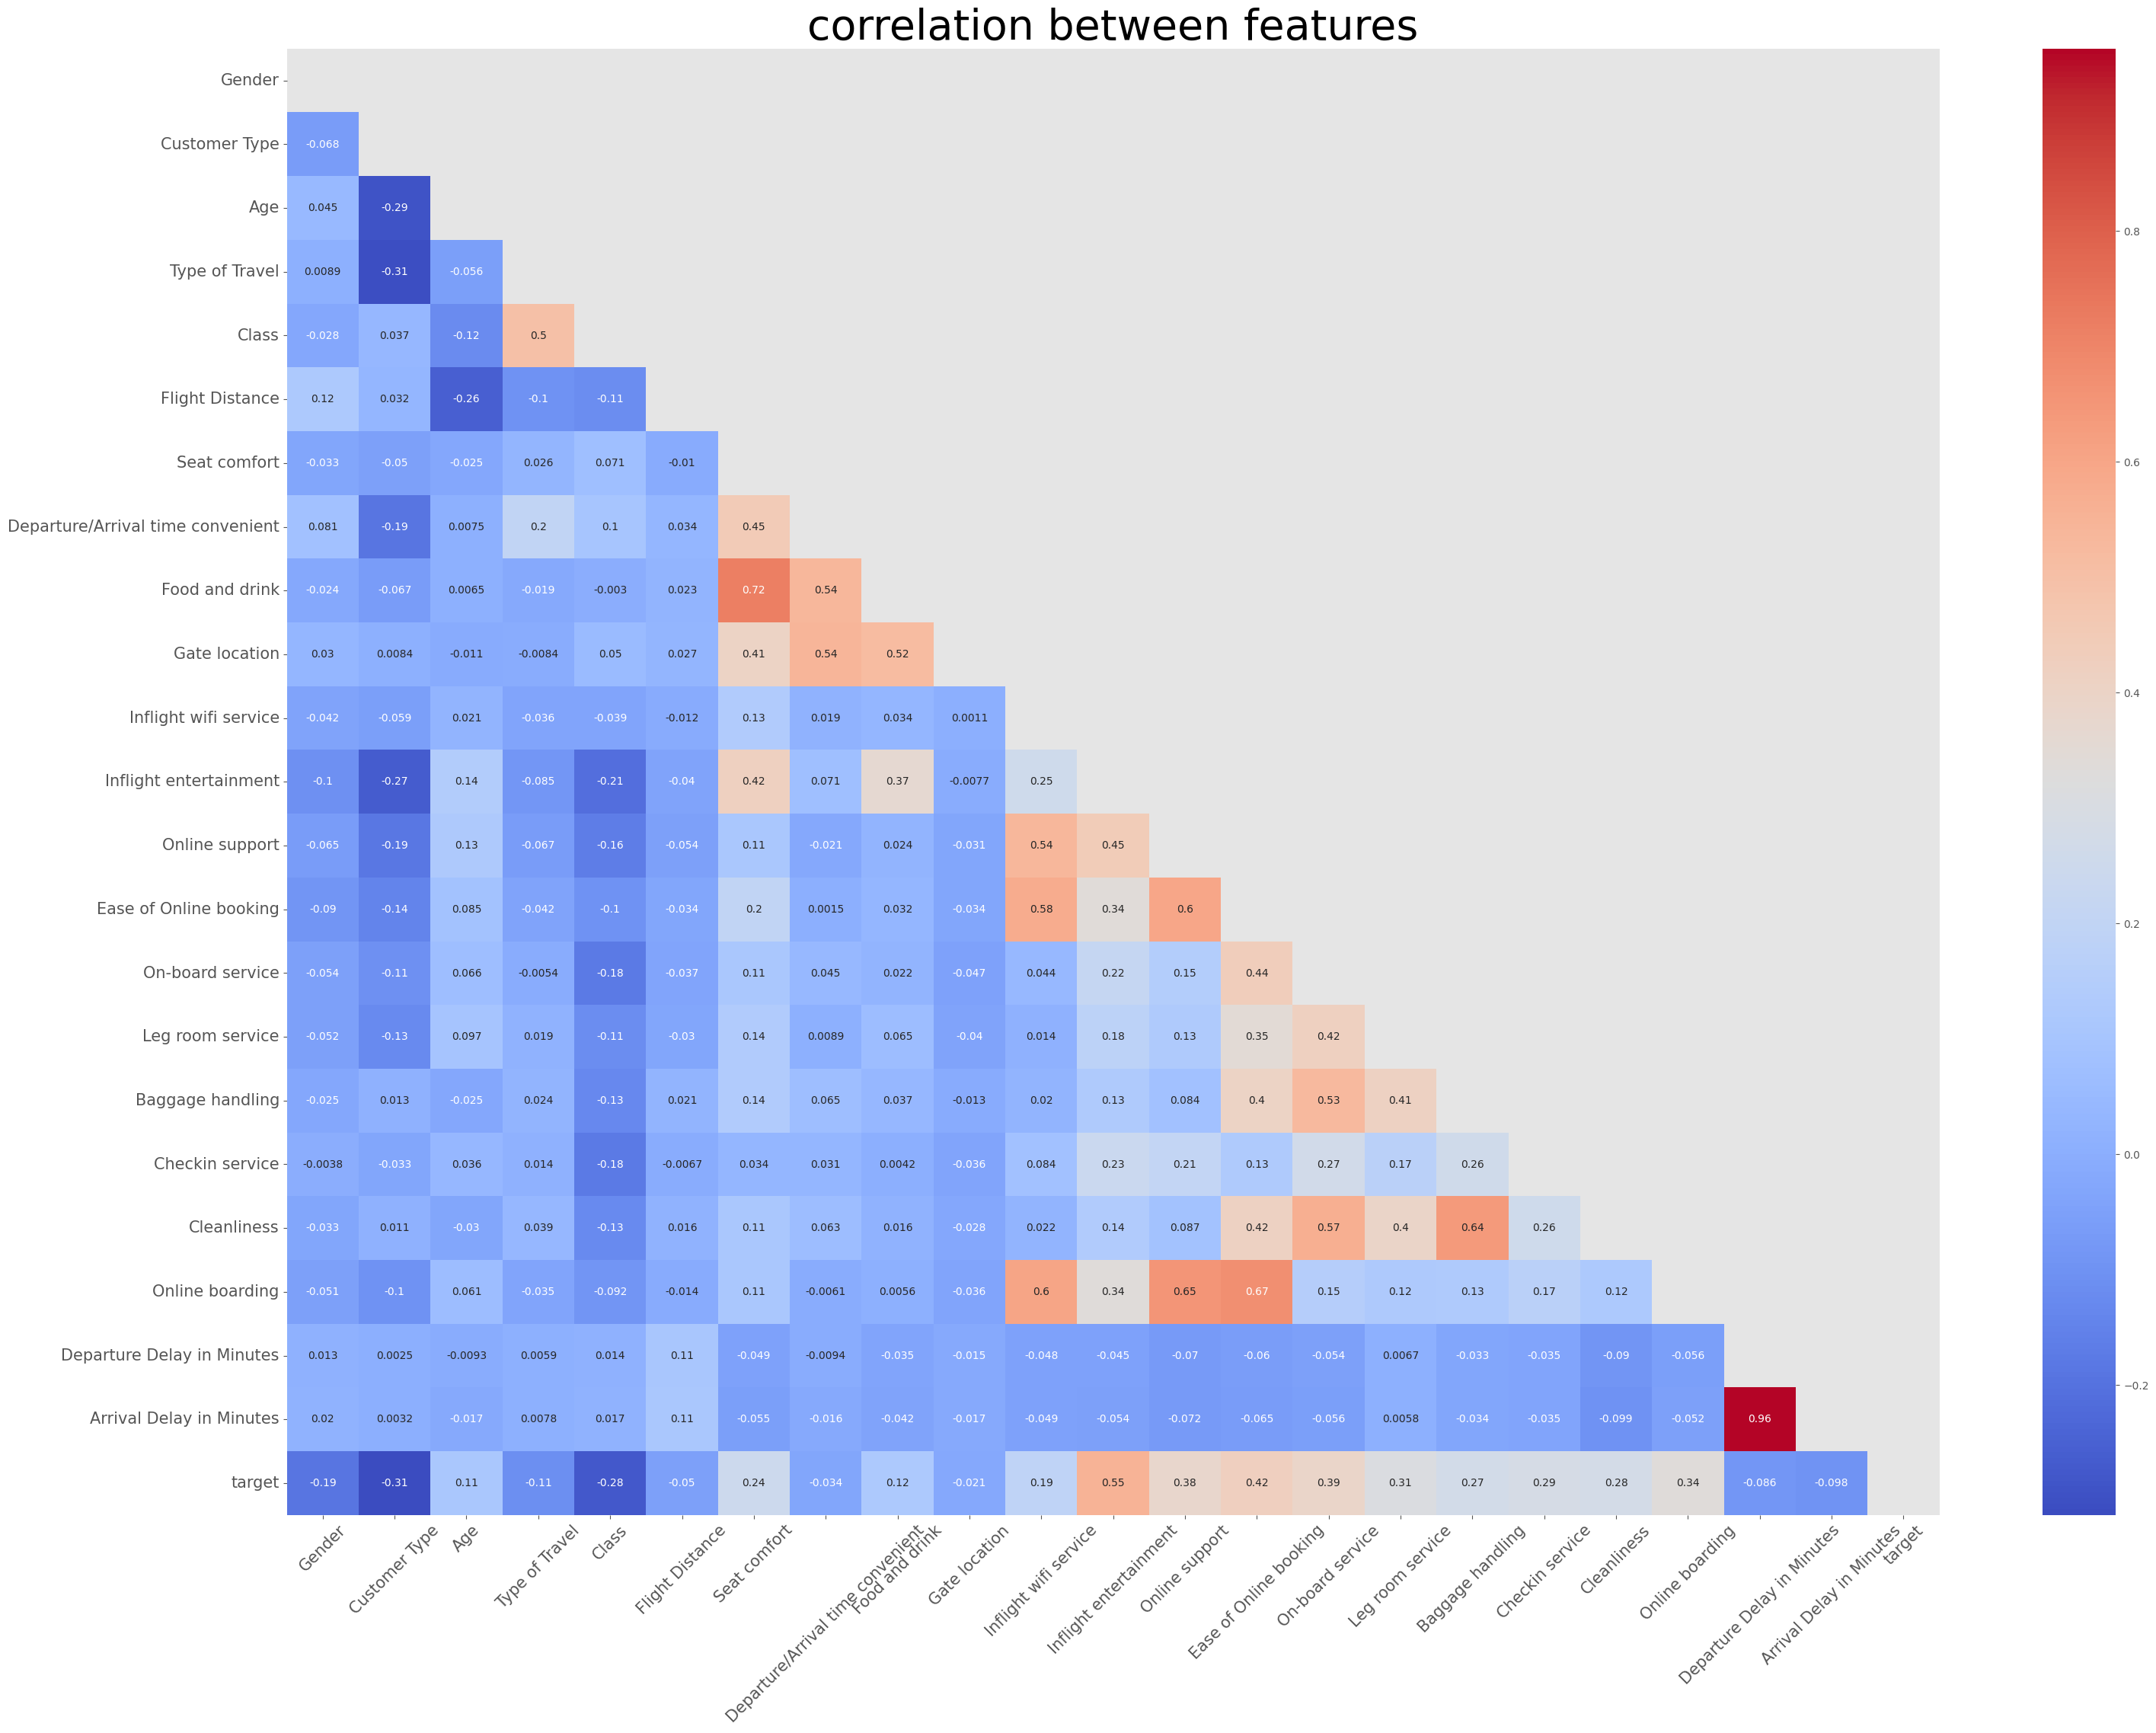

In [9]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

고객 만족도인 target은 Inflight entertainment와 가장 높은 상관을 보이네요!

그 이외에도 Online Support, Ease of Online booking, On-board service 와도 높은 상관을 보입니다.

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.
